# Moment estimator

In this notebook, we will continue with the dataset from the notebook about the `Dataset` object.
The moment estimator will be illustrated.
The moment estimator is also known as the Dekkers-Einmahl-De Haan estimator.
For more information about `Estimate`s, see the notebook about the Hill estimator.

Let's continue with the dataset from the `Dataset` notebook.
It was already determined that the value 15 was a good guess for the threshold.

In [1]:
from evt.dataset import Dataset
from evt.methods.peaks_over_threshold import PeaksOverThreshold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm
import warnings

N_DATAPOINTS = 100000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
THRESHOLD = 15  # threshold in the peaks over threshold method
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour
warnings.filterwarnings("ignore")  # suppress warnings for demonstration

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

peaks_over_threshold = PeaksOverThreshold(dataset, THRESHOLD)

Create a moment estimator object.

In [2]:
from evt.estimators.moment import Moment

moment = Moment(peaks_over_threshold)

The moment estimator is usually interpreted as a plot against the number of order statistics.

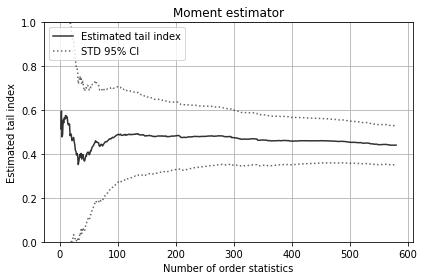

In [3]:
fig, ax = plt.subplots()

moment.plot(ax)

ax.set_ylim(0, 1)  # zoom
fig.tight_layout()
plt.show()

The confidence intervals are based on the asymptotic behaviour of the variance of the estimate.
Bias is not taken into account.
Let's focus on the first 100 order statistics.

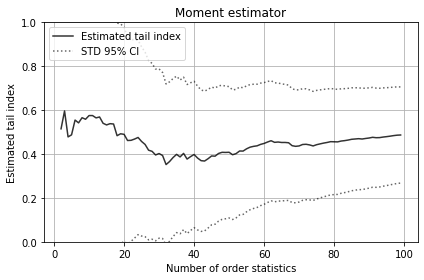

In [4]:
fig, ax = plt.subplots()

moment.plot(ax, max_number_of_order_statistics=100)

ax.set_ylim(0, 1)  # zoom
fig.tight_layout()
plt.show()

In our example, the tail index is already known to be 1/2.5 = 0.4.